In [1]:
# Importing necessary libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Importing data

data_df = pd.read_csv(r'C:\Users\SHREE\Downloads\Python CODES\Video Games Sales Analysis\vgsales.csv')
data_df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [3]:
# Getting som information about data

data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [4]:
# Checking for missing values

data_df.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [5]:
# Dropping missing values

data_df = data_df.dropna(subset=['Year','Publisher'],axis=0)
data_df.isnull().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

Plotting Sales VS Year

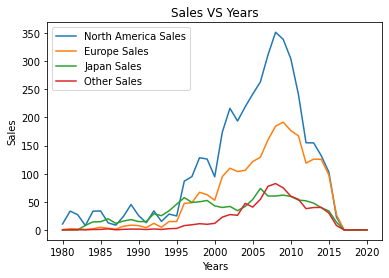

In [6]:
AnnualSalesMarket = data_df.groupby('Year')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum().reset_index()
plt.plot(AnnualSalesMarket['Year'], AnnualSalesMarket['NA_Sales'], label='North America Sales')
plt.plot(AnnualSalesMarket['Year'], AnnualSalesMarket['EU_Sales'], label='Europe Sales')
plt.plot(AnnualSalesMarket['Year'], AnnualSalesMarket['JP_Sales'], label='Japan Sales')
plt.plot(AnnualSalesMarket['Year'], AnnualSalesMarket['Other_Sales'], label='Other Sales')
plt.ylabel('Sales')
plt.xlabel('Years')
plt.title('Sales VS Years')
plt.legend()
plt.show()

In [7]:
# Dropping unwanted columns

data = data_df.drop(['Rank','Name','Year','JP_Sales','Other_Sales','Global_Sales'], axis=1)
data.head()

,Platform,Genre,Publisher,NA_Sales,EU_Sales
0,Wii,Sports,Nintendo,41.49,29.02
1,NES,Platform,Nintendo,29.08,3.58
2,Wii,Racing,Nintendo,15.85,12.88
3,Wii,Sports,Nintendo,15.75,11.01
4,GB,Role-Playing,Nintendo,11.27,8.89


In [9]:
# Converting the object data type columns to string
# Using Label Encoder for coversion of categorical columns to numerical columns 

le = LabelEncoder()
data['Platform'] = le.fit_transform(data['Platform'].astype('str'))
data['Genre'] = le.fit_transform(data['Genre'].astype('str'))
data['Publisher'] = le.fit_transform(data['Publisher'].astype('str'))
data.head()

,Platform,Genre,Publisher,NA_Sales,EU_Sales
0,19,2,289,41.49,29.02
1,3,6,289,29.08,3.58
2,19,8,289,15.85,12.88
3,19,2,289,15.75,11.01
4,26,9,289,11.27,8.89


In [10]:
y = data_df['Global_Sales']

Feature Scaling

Why is scaling important in machine learning?
Scaling the target value is a good idea in regression modelling; scaling of the data makes it easy for a model to learn and understand the problem. Scaling of the data comes under the set of steps of data pre-processing when we are performing machine learning algorithms in the data set.

Here we are scaling the data by standardizing it using Standard Scaler.

- Standardizing the data

Data Standardization - 

Data standardization is the process of rescaling the attributes so that they have mean as 0 and variance as 1. The ultimate goal to perform standardization is to bring down all the features to a common scale without distorting the differences in the range of the values

Standard Scaler - 

StandardScaler removes the mean and scales each feature/variable to unit variance. This operation is performed feature-wise in an independent way. StandardScaler can be influenced by outliers (if they exist in the dataset) since it involves the estimation of the empirical mean and standard deviation of each feature.

In Machine Learning, StandardScaler is used to resize the distribution of values ​​so that the mean of the observed values ​​is 0 and the standard deviation is 1

In [11]:
scaler = StandardScaler()
scaler.fit(data)
data = scaler.transform(data)

Splitting the data into train & test

In [12]:
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.30)

### Linear Regression

- When can I use linear regression?

Regression analysis is used when you want to predict a continuous dependent variable from a number of independent variables. If the dependent variable is dichotomous, then logistic regression should be used.

You can use simple linear regression when you want to know: How strong the relationship is between two variables (e.g. the relationship between rainfall and soil erosion). The value of the dependent variable at a certain value of the independent variable (e.g. the amount of soil erosion at a certain level of rainfall).

Linear Regression, intuitively is a regression algorithm with a Linear approach. We try to predict a continuous value of a given data point by generalising on the data that we have in hand. The linear part indicates that we are using a linear approach in generalising over the data.

Linear regression analysis is used to predict the value of a variable based on the value of another variable. The variable you want to predict is called the dependent variable. The variable you are using to predict the other variable's value is called the independent variable.

Linear Regression, as the name suggests, simply means fitting a line to the data that establishes a relationship between a target 'y' variable with the explanatory 'x' variables.

- How is linear regression used in real life?

Medical researchers often use linear regression to understand the relationship between drug dosage and blood pressure of patients. For example, researchers might administer various dosages of a certain drug to patients and observe how their blood pressure responds.

- How do you choose the best linear regression model?

When choosing a linear model, these are factors to keep in mind:

Only compare linear models for the same dataset.

Find a model with a high adjusted R2.

Make sure this model has equally distributed residuals around zero.

Make sure the errors of this model are within a small bandwidth.

- How do you know if a linear relationship is statistically significant?

To determine whether the correlation between variables is significant, compare the p-value to your significance level. Usually, a significance level (denoted as α or alpha) of 0.05 works well. An α of 0.05 indicates that the risk of concluding that a correlation exists—when, actually, no correlation exists—is 5%.

- In a regression context, the slope is the heart and soul of the equation because it tells you how much you can expect Y to change as X increases. In general, the units for slope are the units of the Y variable per units of the X variable.

- How do you know if a linear regression is appropriate?

If a linear model is appropriate, the histogram should look approximately normal and the scatterplot of residuals should show random scatter . If we see a curved relationship in the residual plot, the linear model is not appropriate. Another type of residual plot shows the residuals versus the explanatory variable.

- There are four assumptions associated with a linear regression model: Linearity: The relationship between X and the mean of Y is linear. Homoscedasticity: The variance of residual is the same for any value of X. Independence: Observations are independent of each other.

- The correlation

R: The correlation between the predictor variable, x, and the response variable, y. 

R2: The proportion of the variance in the response variable that can be explained by the predictor variable in the regression model.

- What does the regression coefficient tell us?

In regression with a single independent variable, the coefficient tells you how much the dependent variable is expected to increase (if the coefficient is positive) or decrease (if the coefficient is negative) when that independent variable increases by one.

- The Correlation Coefficient

When the r value is closer to +1 or -1, it indicates that there is a stronger linear relationship between the two variables. A correlation of -0.97 is a strong negative correlation while a correlation of 0.10 would be a weak positive correlation.

- How do you know if a regression coefficient is significant?

If the p-value is less than the chosen threshold then it is significant. The significance of a regression coefficient in a regression model is determined by dividing the estimated coefficient over the standard deviation of this estimate.

- What is R value in regression?

Simply put, R is the correlation between the predicted values and the observed values of Y. R square is the square of this coefficient and indicates the percentage of variation explained by your regression line out of the total variation. This value tends to increase as you include additional predictors in the model.

- What does a positive R value mean?

The correlation coefficient r ranges between -1 and +1. A positive r values indicates that as one variable increases so does the other, and an r of +1 indicates that knowing the value of one variable allows perfect prediction of the other.

- What is a good regression coefficient?

A value of 1.0 indicates a perfect fit, and is thus a highly reliable model for future forecasts, while a value of 0.0 would indicate that the calculation fails to accurately model the data at all.

- How is r2 value calculated?

R 2 = 1 − sum squared regression (SSR) total sum of squares (SST) , = 1 − ∑ ( y i − y i ^ ) 2 ∑ ( y i − y ¯ ) 2 . The sum squared regression is the sum of the residuals squared, and the total sum of squares is the sum of the distance the data is away from the mean all squared.

- How do you increase R-squared in regression?

When more variables are added, r-squared values typically increase. They can never decrease when adding a variable; and if the fit is not 100% perfect, then adding a variable that represents random data will increase the r-squared value with probability 1.

- How do you interpret R & r2?

The coefficient of determination, R2, is similar to the correlation coefficient, R. The correlation coefficient formula will tell you how strong of a linear relationship there is between two variables. R Squared is the square of the correlation coefficient, r (hence the term r squared).

The most common interpretation of r-squared is how well the regression model fits the observed data. For example, an r-squared of 60% reveals that 60% of the data fit the regression model. Generally, a higher r-squared indicates a better fit for the model.

- Should I report R or R-squared?

If strength and direction of a linear relationship should be presented, then r is the correct statistic. If the proportion of explained variance should be presented, then r² is the correct statistic.

- Is higher adjusted R-squared better?

A higher R-squared value indicates a higher amount of variability being explained by our model and vice-versa. If we had a really low RSS value, it would mean that the regression line was very close to the actual points. This means the independent variables explain the majority of variation in the target variable

- What does P value mean in linear regression?

P-Value is a statistical test that determines the probability of extreme results of the statistical hypothesis test,taking the Null Hypothesis to be correct. It is mostly used as an alternative to rejection points that provides the smallest level of significance at which the Null-Hypothesis would be rejected.

- When interpreting a correlation coefficient it is important to look at?

The correct answer is a) Scores on one variable plotted against scores on a second variable. 3. When interpreting a correlation coefficient, it is important to look at: The +/– sign of the correlation coefficient.

- How do you interpret correlation and regression results?

Both quantify the direction and strength of the relationship between two numeric variables. When the correlation (r) is negative, the regression slope (b) will be negative. When the correlation is positive, the regression slope will be positive.

- How do you tell if a regression model is a good fit?

If the model fit to the data were correct, the residuals would approximate the random errors that make the relationship between the explanatory variables and the response variable a statistical relationship. Therefore, if the residuals appear to behave randomly, it suggests that the model fits the data well.

- How do you interpret a linear regression model?

Linear Regression is the most talked-about term for those who are working on ML and statistical analysis. Linear Regression, as the name suggests, simply means fitting a line to the data that establishes a relationship between a target 'y' variable with the explanatory 'x' variables.

- What are the advantages and disadvantages of linear regression?

Advantages

Linear regression performs exceptionally well for linearly separable data	

Easier to implement, interpret and efficient to train

Disadvantages

The assumption of linearity between dependent and independent variables

It is often quite prone to noise and overfitting

- What are the advantages of linear regression?

The principal advantage of linear regression is its simplicity, interpretability, scientific acceptance, and widespread availability. Linear regression is the first method to use for many problems. Analysts can use linear regression together with techniques such as variable recoding, transformation, or segmentation.

- What are the limitations of linear regression?

Main limitation of Linear Regression is the assumption of linearity between the dependent variable and the independent variables. In the real world, the data is rarely linearly separable. It assumes that there is a straight-line relationship between the dependent and independent variables which is incorrect many times.

- What is Karl Pearson coefficient of correlation?

Karl Pearson's coefficient of correlation is defined as a linear correlation coefficient that falls in the value range of -1 to +1. Value of -1 signifies strong negative correlation while +1 indicates strong positive correlation.

- What are the three strengths of linear regression?

Three major uses for regression analysis are (1) determining the strength of predictors, (2) forecasting an effect, and (3) trend forecasting.



In [15]:
# Model creating & fitting the data in the model

reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [16]:
# Predicting on test data

y_pred = reg.predict(X_test)

In [17]:
# Checking accuracy

Acc_reg = reg.score(X_train, y_train)
acc_reg = reg.score(X_test, y_test)
print ('Train Accuracy : {:.2f}%'.format(Acc_reg*100))
print ('Test Accuracy : {:.2f}%'.format(acc_reg*100))

Train Accuracy : 95.97%
Test Accuracy : 97.23%


In [19]:
# Checking error & r2 score

print('Mean squared error: %.2f'% mean_squared_error(y_test, y_pred))
print('Variance Score: %.2f'% r2_score(y_test, y_pred))

Mean squared error: 0.09
Variance Score: 0.97


### Support Vector Regressor

An intuitive overview of Support vector Regression -

Support Vector Machines(SVM) are one of the state-of-the-art machine learning algorithm based on Maximal Margin Classifier.
SVM support linear as well as non-linear regression called Support Vector Regression(SVR).

Support vector machines (SVM) are a set of supervised learning methods; used for regression, classification. Unlike other learning methods; SVM tries to fit the best decision boundary or hyperplane using some data samples from given training data which are called support vectors. Hyperplane means a flat affine subspace of the dimension p-1 in p dimensional space; in machine learning lingo p are the features.

Support Vector Regression is a supervised learning algorithm that is used to predict discrete values. Support Vector Regression uses the same principle as the SVMs. The basic idea behind SVR is to find the best fit line. In SVR, the best fit line is the hyperplane that has the maximum number of points.

The idea of SVM is simple: The algorithm creates a line or a hyperplane which separates the data into classes.

- What is the objective of the support vector machine algorithm?

The objective of SVM algorithm is to find a hyperplane in an N-dimensional space that distinctly classifies the data points. The dimension of the hyperplane depends upon the number of features. If the number of input features is two, then the hyperplane is just a line.

The goal of SVM is to divide the datasets into classes to find a maximum marginal hyperplane (MMH).

To find the optimal hyperplane with maximum margin; some of the training data points which helps to find it are called support vectors. Support vectors determine the shape of the hyperplane. Other than support vectors does not play any role to decide optimal decision hyperplane.That’s it this is the intuitive explanation of SVM.

Let me give you an analogy:

Linear Regression : Support vector regression : : Logistic regression : Support vector Machine

The difference dwells on the input feature space dimensions.
A linear regression models a line to classify the data points, while a support vector regression can also model a hyperplane.

- Hyperplane

Hyperplane acts as a classifier that splits the input feature space.

A hyperplane is a line that splits the input variable space. In SVM, a hyperplane is selected to best separate the points in the input variable space by their class, either class 0 or class 1.

For a two-variable space, the hyperplane would be a line b0+b1*x1+b2*x2

Where the coefficients (B1 and B2) that determine the slope of the line and the intercept (B0) are found by the learning algorithm, and X1 and X2 are the two input variables.

You can make classifications using this line. By plugging in input values into the line equation, you can calculate whether a new point is above or below the line.

Above the line, the equation returns a value greater than 0 and the point belongs to the first class (class 0).
Below the line, the equation returns a value less than 0 and the point belongs to the second class (class 1).
A value close to the line returns a value close to zero and the point may be difficult to classify.
If the magnitude of the value is large, the model may have more confidence in the prediction.

In case of SVM,

A point above the line gets a label `1`

A point below the line gets a label `0`

A point close to the line return a value close to `0` and the point may be difficult to classify.

If the magnitude of value is large for a test data point, the model will have more confidence in prediction.
Thus, comes the concept of maximising the margin.

- Margin

The points closest to the hyperplane has an uncertain class label or has a class label with nearly equal probability as the other class label.

Margin is the perpendicular distance between the hyperplane and the closest points.

Therefore, SVM tries to maximise this margin and works as `Maximal Margin Classifier`

The distance between the line and the closest data points is referred to as the margin. The best or optimal line that can separate the two classes is the line that as the largest margin. This is called the Maximal-Margin hyperplane.

The margin is calculated as the perpendicular distance from the line to only the closest points. Only these points are relevant in defining the line and in the construction of the classifier. These points are called the support vectors. They support or define the hyperplane.

The hyperplane is learned from training data using an optimization procedure that maximizes the margin.

- Support Vectors

The training instances closest to the hyperplane that help define the margin are called Support Vectors.

Real data is messy!

Thus, we can’t have a perfect hyperplane splitting the data points perfectly into two classes.

We tend to relax the constraint of maximising the margin and allow some points to violate the margin(that is, allow some points to have wrong label as per our model for a good overall performance).

- SVR working

SVR tries to have as many support vectors as possible within the boundary lines without much margin violation, thus keeping the error within the threshold decided by the boundary lines.

Intuitively,these support vectors contribute to the error made by the SVR and thus, we want most of the support vectors to be in that threshold.

We can model SVM as well as SVR through kernels that indicates the similarity measure between the test data point and the support vectors.

- Support Vector Machines (Kernels)

The SVM algorithm is implemented in practice using a kernel.

The learning of the hyperplane in linear SVM is done by transforming the problem using some linear algebra, which is out of the scope of this introduction to SVM.

A powerful insight is that the linear SVM can be rephrased using the inner product of any two given observations, rather than the observations themselves. The inner product between two vectors is the sum of the multiplication of each pair of input values.

For example, the inner product of the vectors [2, 3] and [5, 6] is 2*5 + 3*6 or 28.

The equation for making a prediction for a new input using the dot product between the input (x) and each support vector (xi) is calculated as follows:

f(x) = B0 + sum(ai * (x,xi))

This is an equation that involves calculating the inner products of a new input vector (x) with all support vectors in training data. The coefficients B0 and ai (for each input) must be estimated from the training data by the learning algorithm.

- Linear Kernel SVM

The dot-product is called the kernel and can be re-written as:

K(x, xi) = sum(x * xi)

The kernel defines the similarity or a distance measure between new data and the support vectors. The dot product is the similarity measure used for linear SVM or a linear kernel because the distance is a linear combination of the inputs.

Other kernels can be used that transform the input space into higher dimensions such as a Polynomial Kernel and a Radial Kernel. This is called the Kernel Trick.

It is desirable to use more complex kernels as it allows lines to separate the classes that are curved or even more complex. This in turn can lead to more accurate classifiers.

- Polynomial Kernel SVM

Instead of the dot-product, we can use a polynomial kernel, for example:

K(x,xi) = 1 + sum(x * xi)^d

Where the degree of the polynomial must be specified by hand to the learning algorithm. When d=1 this is the same as the linear kernel. The polynomial kernel allows for curved lines in the input space.

- Radial Kernel SVM

Finally, we can also have a more complex radial kernel. For example:

K(x,xi) = exp(-gamma * sum((x – xi^2))

Where gamma is a parameter that must be specified to the learning algorithm. A good default value for gamma is 0.1, where gamma is often 0 < gamma < 1. The radial kernel is very local and can create complex regions within the feature space, like closed polygons in two-dimensional space.

- How to Learn a SVM Model

The SVM model needs to be solved using an optimization procedure.

You can use a numerical optimization procedure to search for the coefficients of the hyperplane. This is inefficient and is not the approach used in widely used SVM implementations like LIBSVM. If implementing the algorithm as an exercise, you could use stochastic gradient descent.

There are specialized optimization procedures that re-formulate the optimization problem to be a Quadratic Programming problem. The most popular method for fitting SVM is the Sequential Minimal Optimization (SMO) method that is very efficient. It breaks the problem down into sub-problems that can be solved analytically (by calculating) rather than numerically (by searching or optimizing).

- Data Preparation for SVM

This section lists some suggestions for how to best prepare your training data when learning an SVM model.

- Numerical Inputs: 

SVM assumes that your inputs are numeric. If you have categorical inputs you may need to covert them to binary dummy variables (one variable for each category).

- Binary Classification: 

Basic SVM as described in this post is intended for binary (two-class) classification problems. Although, extensions have been developed for regression and multi-class classification.

- Conclusion

Lastly, a major difference between Linear regression and SVR lies on the fact that Linear regression tends to minimize the error and SVR tends to keep it within a threshold.

You can, easily implement SVR(for regression tasks) and SVM(for classification purposes) using the model provided by the skicit-learn library.

from sklearn.svm import SVR

regressor=SVR(kernel=’linear’,degree=1)

Then, fit the model and predict.

In [21]:
# Creating the model & fitting data

model_svr = SVR()
model_svr.fit(X_train, y_train)

SVR()

In [22]:
#Prediction on test data

pred_svr = model_svr.predict(X_test)

In [23]:
# Checking accuracy

Acc_svr = model_svr.score(X_train, y_train)
acc_svr = model_svr.score(X_test, y_test)
print ('Train Accuracy : {:.2f}%'.format(Acc_svr*100))
print ('Test Accuracy : {:.2f}%'.format(acc_svr*100))

Train Accuracy : 65.55%
Test Accuracy : 45.08%


In [24]:
# Checking error & r2 score

print('Mean squared error: %.2f'% mean_squared_error(y_test, pred_svr))
print('Variance Score: %.2f'% r2_score(y_test, pred_svr))

Mean squared error: 1.80
Variance Score: 0.45


### K Neighbors Regressor

KNN regression is a non-parametric method that, in an intuitive manner, approximates the association between independent variables and the continuous outcome by averaging the observations in the same neighbourhood.

The KNN algorithm uses 'feature similarity' to predict the values of any new data points. This means that the new point is assigned a value based on how closely it resembles the points in the training set.

KNN works by finding the distances between a query and all the examples in the data, selecting the specified number examples (K) closest to the query, then votes for the most frequent label (in the case of classification) or averages the labels (in the case of regression).

In [25]:
# Creating model & fitting the training data to model

neigh = KNeighborsRegressor()
neigh.fit(X_train, y_train)

KNeighborsRegressor()

In [26]:
# Predicting on test data

pred_neigh = neigh.predict(X_test)

In [27]:
# Checking the accuracy

Acc_neigh = neigh.score(X_train, y_train)
acc_neigh = neigh.score(X_test, y_test)
print ('Train Accuracy : {:.2f}%'.format(Acc_neigh*100))
print ('Test Accuracy : {:.2f}%'.format(acc_neigh*100))

Train Accuracy : 96.44%
Test Accuracy : 81.63%


In [28]:
# Checking the error & r2 score

print('Mean squared error: %.2f'% mean_squared_error(y_test, pred_neigh))
print('Variance Score: %.2f'% r2_score(y_test, pred_neigh))

Mean squared error: 0.60
Variance Score: 0.82


### Gradient Boosting Regressor

- Ensembles and boosting

Machine learning models can be fitted to data individually, or combined in an ensemble. An ensemble is a combination of simple individual models that together create a more powerful new model.

Machine learning boosting is a method for creating an ensemble. It starts by fitting an initial model (e.g. a tree or linear regression) to the data. Then a second model is built that focuses on accurately predicting the cases where the first model performs poorly. The combination of these two models is expected to be better than either model alone. Then you repeat this process of boosting many times.  Each successive model attempts to correct for the shortcomings of the combined boosted ensemble of all previous models.

- Gradient boosting explained

Gradient boosting is a type of machine learning boosting. It relies on the intuition that the best possible next model, when combined with previous models, minimizes the overall prediction error. The key idea is to set the target outcomes for this next model in order to minimize the error. 

- How are the targets calculated? 

The target outcome for each case in the data depends on how much changing that case's prediction impacts the overall prediction error.

- Prediction error

If a small change in the prediction for a case causes a large drop in error, then next target outcome of the case is a high value. Predictions from the new model that are close to its targets will reduce the error.
If a small change in the prediction for a case causes no change in error, then next target outcome of the case is zero. Changing this prediction does not decrease the error.
The name gradient boosting arises because target outcomes for each case are set based on the gradient of the error with respect to the prediction. Each new model takes a step in the direction that minimizes prediction error, in the space of possible predictions for each training case.

- Why is boosting used?

Boosting is an ensemble learning method that combines a set of weak learners into a strong learner to minimize training errors. In boosting, a random sample of data is selected, fitted with a model and then trained sequentially—that is, each model tries to compensate for the weaknesses of its predecessor.

Gradient Boosting Machine (GBM) A Gradient Boosting Machine or GBM combines the predictions from multiple decision trees to generate the final predictions. Keep in mind that all the weak learners in a gradient boosting machine are decision trees.

In gradient boosting, we predict and adjust our predictions in the opposite (negative gradient) direction. This achieves the opposite (minimize the loss). Since, the loss of a model inversely relates to its performance and accuracy, doing so improves its performance.

Gradient Boosting is a generic algorithm that assists in searching the approximate solutions to the additive modelling problem.

- How does gradient boosting Regressor work?

Gradient boosting algorithm is one of the most powerful algorithms in the field of machine learning. As we know that the errors in machine learning algorithms are broadly classified into two categories i.e. Bias Error and Variance Error. As gradient boosting is one of the boosting algorithms it is used to minimize bias error of the model.

Unlike, Adaboosting algorithm, the base estimator in the gradient boosting algorithm cannot be mentioned by us. The base estimator for the Gradient Boost algorithm is fixed and i.e. Decision Stump. Like, AdaBoost, we can tune the n_estimator of the gradient boosting algorithm. However, if we do not mention the value of n_estimator, the default value of n_estimator for this algorithm is 100.

Gradient boosting algorithm can be used for predicting not only continuous target variable (as a Regressor) but also categorical target variable (as a Classifier). When it is used as a regressor, the cost function is Mean Square Error (MSE) and when it is used as a classifier then the cost function is Log loss.

Gradient boosting involves three elements:

A loss function to be optimized.

A weak learner to make predictions.

An additive model to add weak learners to minimize the loss function.

1. Loss Function

The loss function used depends on the type of problem being solved.

It must be differentiable, but many standard loss functions are supported and you can define your own.

For example, regression may use a squared error and classification may use logarithmic loss.

A benefit of the gradient boosting framework is that a new boosting algorithm does not have to be derived for each loss function that may want to be used, instead, it is a generic enough framework that any differentiable loss function can be used.

2. Weak Learner

Decision trees are used as the weak learner in gradient boosting.

Specifically regression trees are used that output real values for splits and whose output can be added together, allowing subsequent models outputs to be added and “correct” the residuals in the predictions.

Trees are constructed in a greedy manner, choosing the best split points based on purity scores like Gini or to minimize the loss.

Initially, such as in the case of AdaBoost, very short decision trees were used that only had a single split, called a decision stump. Larger trees can be used generally with 4-to-8 levels.

It is common to constrain the weak learners in specific ways, such as a maximum number of layers, nodes, splits or leaf nodes.

This is to ensure that the learners remain weak, but can still be constructed in a greedy manner.

3. Additive Model

Trees are added one at a time, and existing trees in the model are not changed.

A gradient descent procedure is used to minimize the loss when adding trees.

Traditionally, gradient descent is used to minimize a set of parameters, such as the coefficients in a regression equation or weights in a neural network. After calculating error or loss, the weights are updated to minimize that error.

Instead of parameters, we have weak learner sub-models or more specifically decision trees. After calculating the loss, to perform the gradient descent procedure, we must add a tree to the model that reduces the loss (i.e. follow the gradient). We do this by parameterizing the tree, then modify the parameters of the tree and move in the right direction by (reducing the residual loss.

Generally this approach is called functional gradient descent or gradient descent with functions.

One way to produce a weighted combination of classifiers which optimizes [the cost] is by gradient descent in function space

— Boosting Algorithms as Gradient Descent in Function Space

The output for the new tree is then added to the output of the existing sequence of trees in an effort to correct or improve the final output of the model.

A fixed number of trees are added or training stops once loss reaches an acceptable level or no longer improves on an external validation dataset.

Improvements to Basic Gradient Boosting

Gradient boosting is a greedy algorithm and can overfit a training dataset quickly.

It can benefit from regularization methods that penalize various parts of the algorithm and generally improve the performance of the algorithm by reducing overfitting.

In this this section we will look at 4 enhancements to basic gradient boosting:

Tree Constraints

Shrinkage

Random sampling

Penalized Learning

1. Tree Constraints

It is important that the weak learners have skill but remain weak.

There are a number of ways that the trees can be constrained.

A good general heuristic is that the more constrained tree creation is, the more trees you will need in the model, and the reverse, where less constrained individual trees, the fewer trees that will be required.

Below are some constraints that can be imposed on the construction of decision trees:

Number of trees, generally adding more trees to the model can be very slow to overfit. The advice is to keep adding trees until no further improvement is observed.
Tree depth, deeper trees are more complex trees and shorter trees are preferred. Generally, better results are seen with 4-8 levels.
Number of nodes or number of leaves, like depth, this can constrain the size of the tree, but is not constrained to a symmetrical structure if other constraints are used.
Number of observations per split imposes a minimum constraint on the amount of training data at a training node before a split can be considered
Minimim improvement to loss is a constraint on the improvement of any split added to a tree.

2. Weighted Updates

The predictions of each tree are added together sequentially.

The contribution of each tree to this sum can be weighted to slow down the learning by the algorithm. This weighting is called a shrinkage or a learning rate.

Each update is simply scaled by the value of the “learning rate parameter v”

The effect is that learning is slowed down, in turn require more trees to be added to the model, in turn taking longer to train, providing a configuration trade-off between the number of trees and learning rate.

Decreasing the value of v [the learning rate] increases the best value for M [the number of trees].

— Greedy Function Approximation: A Gradient Boosting Machine

It is common to have small values in the range of 0.1 to 0.3, as well as values less than 0.1.

Similar to a learning rate in stochastic optimization, shrinkage reduces the influence of each individual tree and leaves space for future trees to improve the model.

- Stochastic Gradient Boosting

3. Stochastic Gradient Boosting

A big insight into bagging ensembles and random forest was allowing trees to be greedily created from subsamples of the training dataset.

This same benefit can be used to reduce the correlation between the trees in the sequence in gradient boosting models.

This variation of boosting is called stochastic gradient boosting.

at each iteration a subsample of the training data is drawn at random (without replacement) from the full training dataset. The randomly selected subsample is then used, instead of the full sample, to fit the base learner.

A few variants of stochastic boosting that can be used:

Subsample rows before creating each tree.

Subsample columns before creating each tree

Subsample columns before considering each split.

Generally, aggressive sub-sampling such as selecting only 50% of the data has shown to be beneficial.

According to user feedback, using column sub-sampling prevents over-fitting even more so than the traditional row sub-sampling

4. Penalized Gradient Boosting

Additional constraints can be imposed on the parameterized trees in addition to their structure.

Classical decision trees like CART are not used as weak learners, instead a modified form called a regression tree is used that has numeric values in the leaf nodes (also called terminal nodes). The values in the leaves of the trees can be called weights in some literature.

As such, the leaf weight values of the trees can be regularized using popular regularization functions, such as:

L1 regularization of weights.
L2 regularization of weights.
The additional regularization term helps to smooth the final learnt weights to avoid over-fitting. Intuitively, the regularized objective will tend to select a model employing simple and predictive functions.

- How does gradient boosting predict?

Gradient boosting is a type of machine learning boosting. It relies on the intuition that the best possible next model, when combined with previous models, minimizes the overall prediction error. The key idea is to set the target outcomes for this next model in order to minimize the error.

It gives a prediction model in the form of an ensemble of weak prediction models, which are typically decision trees.

Applications: Gradient Boosting Algorithm is generally used when we want to decrease the Bias error.

- What is a gradient boosted decision tree?

Gradient-boosted decision trees are a machine learning technique for optimizing the predictive value of a model through successive steps in the learning process.

- 1st-Estimator

For estimator-1, the root level (level 0) will consist of all the records. The outcome at this level is equal to the mean of the entire predictor column (addition of all values in Predictor column divided by a number of records). Let us find out what is the MSE for this level. MSE is calculated as the mean of the square of errors. Here error is equal to actual predictor-predicted outcome. The outcome for the particular node is always equal to the mean of prdictor records of that node. So, the MSE of the root node of the 1st estimator is calculated as given below.

                                 MSE=(∑(Agei –mu)2 )/9=577.11

The cost function hers is MSE and the objective of the algorithm here is to minimize the MSE.

- Decision Stump

Now, one of the independent variables will be used by the Gradient boosting to create the Decision Stump. Let us suppose that the x1 is used here for prediction. So, the records with False x1 will go in one child node, and records with True x2 will go in another child node.

- 2nd-Estimator:

Let us now find out the estimator-2. Unlike AdaBoost, in the Gradient boosting algorithm, residuals of the first estimator are taken as root nodes. Let us suppose for this estimator another dependent variable is used for prediction. So, the records with False x2 will go in one child node, and records with True x2 will go in another child node.

The prediction of predictor here is slightly tricky. First, the predictor will be predicted from estimator 1 as per the value of x1, and then the mean from the estimator is found out with the help of the value of x2 and then that means is added to x predicted from the first estimator and that is the final prediction of Gradient boosting with two estimators.

The final MSE is much better than the MSE of the root node of the 1st Estimator. This is only for 2 estimators. There can be n number of estimators in gradient boosting algorithm.

The most important thing in this algorithm is to find the best value of n_estimators. Can Find the best estimator with GridSearchCV.

- General Approach for Parameter Tuning

Choose a relatively high learning rate.

Determine the optimum number of trees for this learning rate.

Tune tree-specific parameters for decided learning rate and number of trees.

Lower the learning rate and increase the estimators proportionally to get more robust models.

In [29]:
# Creating model & fitting the training data

gbr = GradientBoostingRegressor()
gbr.fit(X_train,y_train)

GradientBoostingRegressor()

In [30]:
# Predicting on test data

pred_gbr = gbr.predict(X_test)

In [31]:
# Checking accuracy

Acc_gbr = gbr.score(X_train, y_train)
acc_gbr = gbr.score(X_test, y_test)
print ('Train Accuracy : {:.2f}%'.format(Acc_gbr*100))
print ('Test Accuracy : {:.2f}%'.format(acc_gbr*100))

Train Accuracy : 98.18%
Test Accuracy : 84.71%


In [32]:
# Checking error & r2 score

print('Mean squared error: %.2f'% mean_squared_error(y_test, pred_gbr))
print('Variance Score: %.2f'% r2_score(y_test, pred_gbr))

Mean squared error: 0.50
Variance Score: 0.85


### Decision Tree Regressor

- What is decision tree intuition?

Decision Trees are easy & Simple to implement & interpreted. Decision Tree is a diagram (flow) that is used to predict the course of action or a probability. Each branch of the decision tree represents an outcome or decision or a reaction.

Decision Tree Learning is a classic algorithm used in machine learning for classification and regression purposes. The basic intuition behind a decision tree is to map out all possible decision paths in the form of a tree. Each path from the root to a leaf of the tree signifies a decision process.

Conceptually, decision trees are quite simple. We split a dataset into smaller and smaller groups, attempting to make each one as “pure” or “homogenous” as possible. Once we finish splitting, we use the final groups to make predictions on unseen data.

- What is main goal of decision tree learning?

The goal of this algorithm is to create a model that predicts the value of a target variable, for which the decision tree uses the tree representation to solve the problem in which the leaf node corresponds to a class label and attributes are represented on the internal node of the tree.

Decision trees use a criteria (there are multiple criteria available) to decide to split a node in two or more sub-nodes
The creation of sub-nodes increases the homogeneity of resultant sub-nodes. In other words, we can say that purity of the node increases with respect to the target variable
Decision tree splits the nodes on all available variables and then selects the split which results in most homogeneous sub-nodes.

- What is a child node decision tree?

In a decision tree building process, two important decisions are to be made — what is the best split(s) and which is the best variable to split a node. Information Gain criteria helps in making these decisions. Using a independent variable value(s), the child nodes are created.

- Important Terminology related to Decision Trees

Root Node: It represents entire population or sample and this further gets divided into two or more homogeneous sets.

Splitting: It is a process of dividing a node into two or more sub-nodes.

Decision Node: When a sub-node splits into further sub-nodes, then it is called decision node.

Leaf / Terminal Node: Nodes do not split is called Leaf or Terminal node.

Pruning: When we remove sub-nodes of a decision node, this process is called pruning.

Branch / Sub-Tree: A sub section of entire tree is called branch or sub-tree.

Parent and Child Node: A node, which is divided into sub-nodes is called parent node of sub-nodes where as sub-nodes are the child of parent node.

- What constitutes a good split?

A successful decision tree is one that does a good job of “splitting” data into homogeneous groups. Therefore, in order to build a good decision tree algorithm, we’ll need a method for evaluating splits.
One of the most popular methods for assessing the quality of a split is called “Gini Impurity”.

Interpreting Gini Impurity is simple. A value of 0 means that a group is perfectly homogenous. In other words, all records in the group belong to the same class. A value of 0.5, on the other hand, means that a group is completely split between classes.
When we evaluate potential splits, we want to choose the one that has the lowest Gini Impurity (ie. the one that is closest to perfect “purity”).

- Calculating Gini Impurity is a bit convoluted, but it helps cement the intuition behind decision tree splits.

First, we calculate the percentage of records that fall into each class (p). Then we square those numbers and add them together. Finally, we subtract that number from one.
Because decision trees split data into more than one group, our final step is to calculate the weighted average of the Gini Impurity in each group.
Note the difference between a “group” (also known as a “node” in decision tree terminology) and a “class”. Groups or nodes are what we create when we do a split. Classes are our target variables — the thing we are trying to predict.

To start, we’ll need to choose a column and value to split on. Ex. Let’s use Sales Prior Year ≥ $100.
Next, we separate our dataset into two groups — those with prior sales ≥ $100 and those with prior sales <$100.
Third, we apply the Gini Impurity formula to each node.

Finally, we take the weighted average of the two numbers. Because each node has the same number of records (n) this amounts to a simple average:

Note that our first node (where prior sales < $100) has a Gini Impurity of 0 because all of the records fall into the same class. Our second node, on the other hand, has a Gini Impurity of .44 because class membership is divided.
Now that we know how to evaluate the quality of each split.

- How do we decide what to split on?

In our above example, we evaluated the Gini Impurity on one potential split. But how do we know this was the right choice? And how do we know what to split on next?
The simple answer is that we can’t know unless we try all options. So that’s exactly what we do.
At any given node, we loop through all of the unique values in all of our columns and choose the one with the lowest Gini Index. By definition, this is what makes the decision tree a greedy algorithm — one in which we select the most optimal choice at each step.

Once we identify the lowest Gini Impurity among these options, we make the split and then run the same process on each of the resulting nodes.

- When do we stop splitting?

We’re nearly there. The last step is to figure out when to stop splitting.
But first, why do we need to stop at all? To answer that question, think about what would happen if we put no restrictions on splitting and we had a complex dataset…
Chances are that our algorithm would be able to find lots of weird combinations of features to reach homogeneity for every node. This, of course, would be textbook overfitting. In other words, these decision rules would probably perform terribly on unseen data because they are far too complex.
In order to solve this problem (at least partially), we set up rules for when we want to stop a split. There are many rules we can draw from; below are the two most common:
Max depth: Here we set a limit on the depth of our tree. Depth is simply a measure of how far we are from the start of our tree. For example, if we set a max depth of two, we would stop expanding after splitting twice:

- Minimum samples split: 

This is the minimum number of records that must be in a node in order to split. If we set our minimum samples to 50, then we would stop splitting any node with less than 50 records.

- Closing Thoughts

When we put it all together, decision trees are pretty easy to grasp. We take a dataset and split it continuously. Each time we split, we look at all possible options and choose the one that creates the most pure groups. Finally, we add some rules that govern when and how we stop splitting.
The wonderful thing about tree-based models is that they build upon each other neatly. 

In [33]:
# Creating model & fitting training data

dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)

DecisionTreeRegressor()

In [34]:
# Prediction on test data

pred_dtr = dtr.predict(X_test)

In [35]:
# Checking accuracy

Acc_dtr = dtr.score(X_train, y_train)
acc_dtr = dtr.score(X_test, y_test)
print ('Train Accuracy : {:.2f}%'.format(Acc_dtr*100))
print ('Test Accuracy : {:.2f}%'.format(acc_dtr*100))

Train Accuracy : 99.78%
Test Accuracy : 83.97%


In [36]:
# Checking error & r2 score

print('Mean squared error: %.2f'% mean_squared_error(y_test, pred_dtr))
print('Variance Score: %.2f'% r2_score(y_test, pred_dtr))

Mean squared error: 0.53
Variance Score: 0.84


### Random Forest Regressor

The random forest is an algorithm that aggregates numerous, independently trained decision trees to make predictions. This “wisdom of the crowd” approach allows it to learn from a diverse set of data, leading to more stable and generalizable results.

- How does a random forest Regressor work?

Random forest is a type of supervised learning algorithm that uses ensemble methods (bagging) to solve both regression and classification problems. The algorithm operates by constructing a multitude of decision trees at training time and outputting the mean/mode of prediction of the individual trees.

Ensemble learning method is a technique that combines predictions from multiple machine learning algorithms to make a more accurate prediction than a single model.

The fundamental idea behind a random forest is to combine many decision trees into a single model. Individually, predictions made by decision trees (or humans) may not be accurate, but combined together, the predictions will be closer to the mark on average.

1. Bagging – 

Suppose we have a dataset, and we make different models on the same dataset and combine it, will it be useful? No right? There is a high chance we’ll get the same results since we are giving the same input. So instead we use a technique called bootstrapping. In this, we create subsets of the original dataset with replacement. The size of the subsets is the same as the size of the original set. Since we do this with replacement so there is a high chance that we provide different data points to our models.

2. Boosting – 

Suppose any data point in your observation has been incorrectly classified by your 1st model, and then the next (probably all the models), will combine the predictions provide better results? Off-course it’s a big NO.

Boosting technique is a sequential process, where each model tries to correct the errors of the previous model. The succeeding models are dependent on the previous model.

It combines weak learners into strong learners by creating sequential models such that the final model has the highest accuracy. For example, ADA BOOST, XG BOOST.

- What is the Random Forest Algorithm?

Random Forest is a technique that uses ensemble learning, that combines many weak classifiers to provide solutions to complex problems.

As the name suggests random forest consists of many decision trees. Rather than depending on one tree it takes the prediction from each tree and based on the majority votes of predictions, predicts the final output.

It consists of 3 components which are the root node, decision node, leaf node. The node from where the population starts dividing is called a root node. The nodes we get after splitting a root node are called decision nodes and the node where further splitting is not possible is called a leaf node. The question comes how do we know which feature will be the root node? In a dataset there can be 100’s of features so how do we decide which feature will be our root node. To answer this question, we need to understand something called the “Gini Index”

- What is Gini Index?

To select a feature to split further we need to know how impure or pure that split will be. A pure sub-split means that either you should be getting “yes” or “no”.

gini index for Random Forest Algorithm

We will see what output we get after splitting, taking each feature as our root node.

splitting for Random Forest Algorithm

When we take feature 1 as our root node, we get a pure split whereas when we take feature 2, the split is not pure. So how do we know that how much impurity this particular node has? This can be understood with the help of the “Gini Index”.

We basically need to know the impurity of our dataset and we’ll take that feature as the root node which gives the lowest impurity or say which has the lowest Gini index.

gini formula

Where P+ is the probability of a positive class and P_ is the probability of a negative class.

- Steps involved in Random Forest Algorithm

Step-1 – We first make subsets of our original data. We will do row sampling and feature sampling that means we’ll select rows and columns with replacement and create subsets of the training dataset

Step- 2 – We create an individual decision tree for each subset we take

Step-3 – Each decision tree will give an output

Step 4 – Final output is considered based on Majority Voting if it’s a classification problem and average if it’s a regression problem.

- How do you increase the accuracy of a random forest Regressor?

If you want to increase the accuracy of your model, increase the number of trees. Specify the maximum number of features to be included at each node split. This depends very heavily on your dataset. If your independent variables are highly correlated, you'll want to decrease the maximum number of features.

In [37]:
# Creating the model & fitting the train data

rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)

RandomForestRegressor()

In [38]:
#Prediction on test data

pred_rfr = rfr.predict(X_test)

In [39]:
# Checking accuracy

Acc_rfr = rfr.score(X_train, y_train)
acc_rfr = rfr.score(X_test, y_test)
print ('Train Accuracy : {:.2f}%'.format(Acc_rfr*100))
print ('Test Accuracy : {:.2f}%'.format(acc_rfr*100))

Train Accuracy : 99.13%
Test Accuracy : 83.89%


In [40]:
# Checking error & r2 score

print('Mean squared error: %.2f'% mean_squared_error(y_test, pred_rfr))
print('Variance Score: %.2f'% r2_score(y_test, pred_rfr))

Mean squared error: 0.53
Variance Score: 0.84


### Final Report

In [42]:
output = pd.DataFrame({"Model":['Linear Regression','Support Vector Regressor','K Neighbors Regressor',
                                'Gradient Boosting Regressor','Decision Tree Regressor',
                               'Random Forest Regressor'],
                      "Accuracy":[acc_reg, acc_svr, acc_neigh, acc_gbr, acc_dtr, acc_rfr]})
output

,Model,Accuracy
0,Linear Regression,0.972324
1,Support Vector Regressor,0.450810
2,K Neighbors Regressor,0.816287
3,Gradient Boosting Regressor,0.847138
4,Decision Tree Regressor,0.839698
5,Random Forest Regressor,0.838905


<AxesSubplot:xlabel='Accuracy', ylabel='Model'>

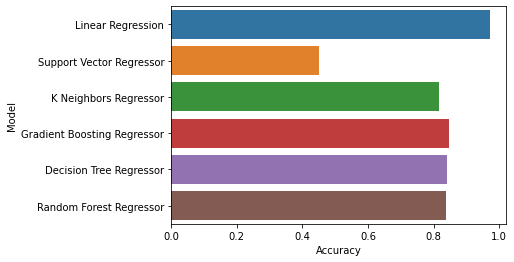

In [43]:
sns.barplot(x='Accuracy', y='Model', data=output)